In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
#version.

2.17.0
1.26.4
2.1.4


Loading the data and print first 5 rows to see weather its properly loaded or not

In [5]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To Check if there is Any Null value if ther is then we have to preprocess the data and may be data cleaning also, But in our case its nothing is empty

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


we have used one hot encodding where we can change the type of string to numeric can binary or in 0 and 1 terms which will be easy for my model to learn.

In [7]:
df_one_hot=pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


Now lets Do some data Analaysis and know which feature are affecting out values

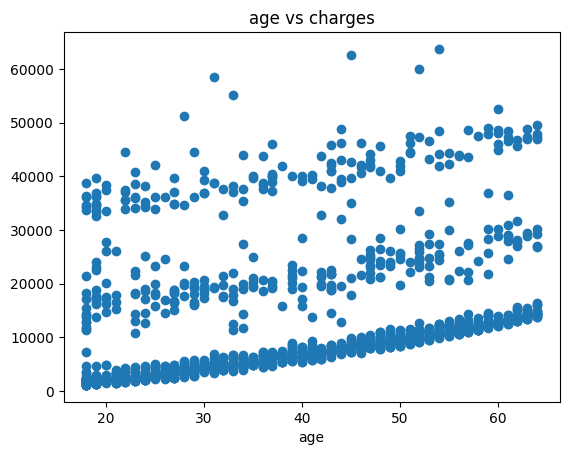

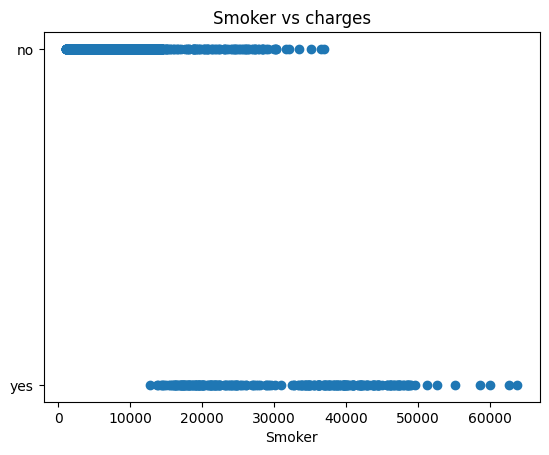

In [8]:
plt.scatter(df_one_hot['age'],df_one_hot['charges'])
plt.title('age vs charges')
plt.xlabel('age')
plt.show()
plt.scatter(df_one_hot['charges'],df['smoker'])
plt.title('Smoker vs charges')
plt.xlabel('Smoker')
plt.show()

In [35]:
# from re import X
X_train,X_test,y_train,y_test=train_test_split(df_one_hot.drop('charges',axis=1),df_one_hot['charges'],test_size=0.2)

In [32]:
tf.random.set_seed(10)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'])
history=model.fit(X_train,y_train,epochs=150)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12938.5908 - mae: 12938.5908
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7948.1650 - mae: 7948.1650
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7324.9907 - mae: 7324.9907
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7080.2358 - mae: 7080.2358
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6779.6099 - mae: 6779.6099
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6437.7944 - mae: 6437.7944
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6304.5928 - mae: 6304.5928
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6174.9019 - mae: 6174.9019
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6031.7397 - mae: 6031.7397
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5832.8105 - mae: 5832.8105
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5532.8140 - mae: 5532.8140
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [33]:
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3657.2534 - mae: 3657.2534  


[3643.84521484375, 3643.84521484375]

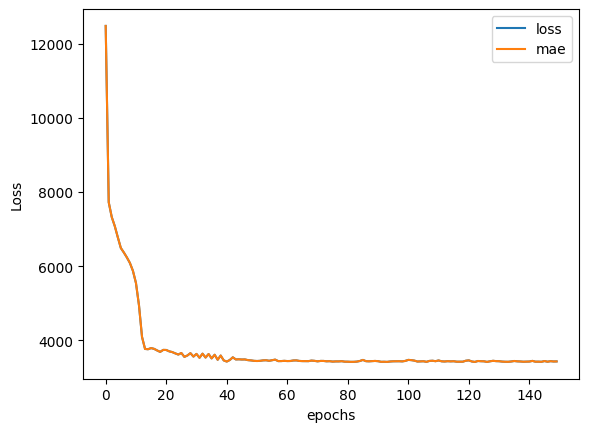

In [34]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

Normalizing the Data

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [37]:
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
ct.fit(X_train)
# Important To first Fit to Train and then to transform.
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [39]:
print(X_train_normal)

[[0.47826087 0.3424805  0.6        ... 1.         0.         0.        ]
 [0.97826087 0.5472155  0.         ... 0.         1.         0.        ]
 [0.06521739 0.11501211 0.6        ... 0.         0.         0.        ]
 ...
 [0.91304348 0.22491256 0.2        ... 1.         0.         0.        ]
 [0.73913043 0.25127791 0.4        ... 0.         1.         0.        ]
 [0.7173913  0.22746839 0.8        ... 1.         0.         0.        ]]


In [40]:
history=model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11810.0107 - mae: 11810.0107
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7715.8213 - mae: 7715.8213
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5716.7812 - mae: 5716.7812
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5576.7642 - mae: 5576.7642
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5567.0840 - mae: 5567.0840
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5541.9717 - mae: 5541.9717 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5533.7188 - mae: 5533.7188 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5530.1094 - mae: 5530.1094 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5526.8198 - mae: 5526.8198 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5524.2056 - mae: 5524.2056
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5522.0894 - mae: 5522.0894 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

Below is the Implementation of **Early stopping Model** where if after a 10 epoch if the error is still almost same then stop so now we can use Epoch up to 5000 or 50k also and when our model is Fine Tune it will stop there.

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Define a simple model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(input_shape,)),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Early stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     min_delta=0.001,
#     restore_best_weights=True
# )

# # Train the model
# history = model.fit(
#     x_train, y_train,
#     validation_data=(x_val, y_val),
#     epochs=100,  # Maximum number of epochs
#     callbacks=[early_stopping]  # Apply early stopping
# )
